In [3]:
import pandas as pd
from sqlalchemy import create_engine
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import os
import json
import pprint
import circlify
import matplotlib.cm as cm
pio.renderers.default = "notebook_connected"


os.getcwd()





'/Users/dianagibson/Desktop/DA/Challenges/Data-Visualization/Project 3/Trails'

In [4]:


# Replace with your actual database connection info
# Connect to your PostgresSQL DB
engine = create_engine("sqlite:///../resources/trails.db")



# Load CSV
database_path = Path("../resources/Trails.csv")
df = pd.read_csv(database_path)

# Load into newly created table
df.to_sql("trails", engine, if_exists="replace", index=False)
df.columns = [col.replace("OSMPTrailsOSMP", "") for col in df.columns]

df.head()


,OBJECTID,OWNER,BICYCLES,DISPLAY,TRAILTYPE,DATEFROM,DATETO,SEGMENTID,HORSES,RID,...,OSMPTrailClosuresCLOSUREDURATION,OSMPTrailClosuresWEBLINK,OSMPTrailClosuresCLOSUREAREA,OSMPTrailClosuresTRAILSTATUS,OSMPTrailClosuresCLOSUREREASON,OSMPTrailClosuresLOCATIONDESCRIPTION,OSMPTrailClosuresCONTACT,OSMPTrailClosuresCOMMENTS,OSMPTrailClosuresGLOBALID,OSMPTrailClosuresSEGMENTID
0,2669,OSMP,No,Yes,Hiking Trail,2022/06/05 00:00:00+00,2099/12/31 00:00:00+00,289-334-328,Yes,2052,...,NaN,NaN,NaN,Open,Hazardous Conditions,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{3FFDA1D3-AF1A-46C7-87E2-4A4707D27043},289-334-328
1,2671,OSMP,Yes,Yes,Multi-Use Trail,2023/05/22 00:00:00+00,2099/12/31 00:00:00+00,518-678-538,Yes,2214,...,Until Further Notice,NaN,NaN,Open,Construction,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{13A86ADE-5F3C-42DF-9BB4-2068A290C8E4},518-678-538
2,2672,OSMP,Yes,Yes,Multi-Use Trail,2023/05/21 00:00:00+00,2099/12/31 00:00:00+00,506-550-678,Yes,2212,...,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{AF6F3A35-0B7B-40B5-97B4-7E32A5F17791},506-550-678
3,2673,OSMP,Yes,Yes,Multi-Use Trail,2023/05/21 00:00:00+00,2099/12/31 00:00:00+00,506-678-551,Yes,2213,...,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{E20E1606-73D2-4AA7-B6CD-1D7A3222D9D0},506-678-551
4,2675,OSMP,No,Yes,Hiking Trail,2021/07/28 00:00:00+00,2099/12/31 00:00:00+00,228-147-247,Yes,1979,...,NaN,NaN,NaN,Open,Maintenance,NaN,https://bouldercolorado.gov/services/osmp-clos...,Closed for NCAR Fire,{2BE6F52A-EA3B-434B-B169-CEC9C646747B},228-147-247


In [5]:
print(df.columns.tolist())

['OBJECTID', 'OWNER', 'BICYCLES', 'DISPLAY', 'TRAILTYPE', 'DATEFROM', 'DATETO', 'SEGMENTID', 'HORSES', 'RID', 'TRLID', 'MILEAGE', 'MEASUREDFEET', 'TRAILNAME', 'GlobalID', 'DIFFICULTY', 'DOGS', 'DOGREGGEN', 'DOGREGDESC', 'EBIKES', 'SHAPESTLength', 'OSMPTrailClosuresOBJECTID', 'OSMPTrailClosuresRID', 'OSMPTrailClosuresCLOSUREDURATION', 'OSMPTrailClosuresWEBLINK', 'OSMPTrailClosuresCLOSUREAREA', 'OSMPTrailClosuresTRAILSTATUS', 'OSMPTrailClosuresCLOSUREREASON', 'OSMPTrailClosuresLOCATIONDESCRIPTION', 'OSMPTrailClosuresCONTACT', 'OSMPTrailClosuresCOMMENTS', 'OSMPTrailClosuresGLOBALID', 'OSMPTrailClosuresSEGMENTID']


In [32]:
# rename columns for readability
rename_map = {
    'OBJECTID': 'object_id',
    'OWNER': 'owner',
    'BICYCLES': 'bicycles',
    'DISPLAY': 'display',
    'TRAILTYPE': 'trail_type',
    'DATEFROM': 'date_from',
    'DATETO': 'date_to',
    'SEGMENTID': 'segment_id',
    'HORSES': 'horses',
    'RID': 'rid',
    'TRLID': 'trail_id',
    'MILEAGE': 'length_miles',
    'MEASUREDFEET': 'length_feet',
    'TRAILNAME': 'trail_name',
    'GlobalID': 'global_id',
    'DIFFICULTY': 'difficulty',
    'DOGS': 'dogs',
    'DOGREGGEN': 'dog_regulation_general',
    'DOGREGDESC': 'dog_regulation_description',
    'EBIKES': 'ebikes',
    'SHAPESTLength': 'geometry_length',
    
    # Trail closures
    'OSMPTrailClosuresOBJECTID': 'closure_object_id',
    'OSMPTrailClosuresRID': 'closure_rid',
    'OSMPTrailClosuresCLOSUREDURATION': 'closure_duration',
    'OSMPTrailClosuresWEBLINK': 'closure_weblink',
    'OSMPTrailClosuresCLOSUREAREA': 'closure_area',
    'OSMPTrailClosuresTRAILSTATUS': 'closure_status',
    'OSMPTrailClosuresCLOSUREREASON': 'closure_reason',
    'OSMPTrailClosuresLOCATIONDESCRIPTION': 'closure_location_description',
    'OSMPTrailClosuresCONTACT': 'closure_contact',
    'OSMPTrailClosuresCOMMENTS': 'closure_comments',
    'OSMPTrailClosuresGLOBALID': 'closure_global_id',
    'OSMPTrailClosuresSEGMENTID': 'closure_segment_id'
}


In [7]:
# save the new columns to a new dataframe
df_cleaned = df.rename(columns=rename_map)
print(df_cleaned.columns.tolist())

['object_id', 'owner', 'bicycles', 'display', 'trail_type', 'date_from', 'date_to', 'segment_id', 'horses', 'rid', 'trail_id', 'length_miles', 'length_feet', 'trail_name', 'global_id', 'difficulty', 'dogs', 'dog_regulation_general', 'dog_regulation_description', 'ebikes', 'geometry_length', 'closure_object_id', 'closure_rid', 'closure_duration', 'closure_weblink', 'closure_area', 'closure_status', 'closure_reason', 'closure_location_description', 'closure_contact', 'closure_comments', 'closure_global_id', 'closure_segment_id']


In [8]:
# Drop all closure columns

# List all closure relatied columns
closure_cols = [col for col in df_cleaned.columns if col.startswith("closure_")]
df_cleaned = df_cleaned.drop(columns=closure_cols)
print(df_cleaned.columns.tolist())

['object_id', 'owner', 'bicycles', 'display', 'trail_type', 'date_from', 'date_to', 'segment_id', 'horses', 'rid', 'trail_id', 'length_miles', 'length_feet', 'trail_name', 'global_id', 'difficulty', 'dogs', 'dog_regulation_general', 'dog_regulation_description', 'ebikes', 'geometry_length']


In [9]:
print(df_cleaned['dogs'].value_counts(dropna=False))
print("-------")
print(df_cleaned['dog_regulation_description'].value_counts(dropna=False))

dogs
Yes    569
No      29
Name: count, dtype: int64
-------
dog_regulation_description
Leash, Or Voice and Sight Control     359
Leash Required                        179
No Dogs                                29
On-Corridor Voice and Sight            20
Leash Required on Portion of Trail      2
LVS M-F, Leash Required Sat & Sun       2
NaN                                     2
Leash, Or Voice and SIght Control       1
Leash, Or Voice and Sigth Control       1
Leash, Or Voice and Sight Contorl       1
Leash Required on South Portion         1
Regulation Varies                       1
Name: count, dtype: int64


In [10]:
# create categories for 
def categorize_dog_policy(desc):
    if pd.isna(desc):
        return None

    desc = desc.lower().strip()

    if "no dogs" in desc:
        return "no_dogs"
    elif "voice and sight" in desc or "off-leash" in desc or "on-corridor voice and sight" in desc:
        return "off_leash"
    elif "leash" in desc:
        return "leash_required"
    else:
        return None


In [11]:
# Create new column in df_cleaned
# Apply dog policy classification

df_cleaned['dog_access'] = df_cleaned['dog_regulation_description'].apply(categorize_dog_policy)

# Filter out any rows that don't match one of the 3
df_cleaned = df_cleaned[df_cleaned['dog_access'].notnull()]

# Check the breakdown
print(df_cleaned['dog_access'].value_counts())

dog_access
off_leash         381
leash_required    185
no_dogs            29
Name: count, dtype: int64


In [12]:
# Check new column was created!
print(df_cleaned.columns.tolist())

['object_id', 'owner', 'bicycles', 'display', 'trail_type', 'date_from', 'date_to', 'segment_id', 'horses', 'rid', 'trail_id', 'length_miles', 'length_feet', 'trail_name', 'global_id', 'difficulty', 'dogs', 'dog_regulation_general', 'dog_regulation_description', 'ebikes', 'geometry_length', 'dog_access']


In [13]:
# Create separate data frames for each category

off_leash_df = df_cleaned[df_cleaned['dog_access'] == 'off_leash']
leash_required_df = df_cleaned[df_cleaned['dog_access'] == 'leash_required']
no_dogs_df = df_cleaned[df_cleaned['dog_access'] == 'no_dogs']


In [14]:
# check counts 
print(f"Off-leash trails: {len(off_leash_df)}")
print(f"Leash required trails: {len(leash_required_df)}")
print(f"No dogs allowed trails: {len(no_dogs_df)}")


Off-leash trails: 381
Leash required trails: 185
No dogs allowed trails: 29


In [15]:
# Create dictionary of dog policy dataframes
dog_policy_dfs = {
    'off_leash': off_leash_df,
    'leash_required': leash_required_df,
    'no_dogs': no_dogs_df
}


In [16]:
# load and inspect geoJSON which has the geographic trail info

with open("../resources/OSMP_Trails.geojson", "r") as f:
    geojson = json.load(f)

# Check what it looks like

pprint.pprint(geojson, depth=2)

{'crs': {'properties': {...}, 'type': 'name'},
 'features': [{...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
              {...},
        

In [17]:
coords_list = []

# Loop through each trail feature and extract the useful info 
for feature in geojson["features"]:
    props = feature["properties"]
    trail_id = props.get("OSMPTrailsOSMPTRLID")
    trail_name = props.get("OSMPTrailsOSMPTRAILNAME")
    
    # extract coordinates
    coordinates = feature["geometry"].get("coordinates", [])
    if coordinates and isinstance(coordinates[0], list): # this checks if coordinates exist and look valid
        lon, lat = coordinates[0]
        coords_list.append({ #store coordinates in a list of dictionaries
            "OSMPTrailsOSMPTRLID": trail_id,
            "OSMPTrailsOSMPTRAILNAME": trail_name,
            "latitude": lat,
            "longitude": lon
        })

coords_df = pd.DataFrame(coords_list) # create DF of trail coordinates

In [18]:
# rename columns in coords df to match cleaned_df
coords_df = coords_df.rename(columns={
    "OSMPTrailsOSMPTRLID": "trail_id",
    "OSMPTrailsOSMPTRAILNAME": "trail_name"
})

# check column names in both DataFrames
print("Cleaned trail df columns:\n", df_cleaned.columns.tolist())
print("Coordinates df columns:\n", coords_df.columns.tolist())

Cleaned trail df columns:
 ['object_id', 'owner', 'bicycles', 'display', 'trail_type', 'date_from', 'date_to', 'segment_id', 'horses', 'rid', 'trail_id', 'length_miles', 'length_feet', 'trail_name', 'global_id', 'difficulty', 'dogs', 'dog_regulation_general', 'dog_regulation_description', 'ebikes', 'geometry_length', 'dog_access']
Coordinates df columns:
 ['trail_id', 'trail_name', 'latitude', 'longitude']


In [19]:
print(df_cleaned.loc[:, df_cleaned.columns == "trail_id"].head())

   trail_id
0       289
1       518
2       506
3       506
4       228


In [20]:
# Merge With Cleaned Trail Data
# Merge using the TRLID key
merged_df = df_cleaned.merge(coords_df, on="trail_id", how="inner")

# Check results
print(merged_df[['trail_id', 'dog_access', 'latitude', 'longitude']].head())


   trail_id      dog_access   latitude   longitude
0       289       off_leash  40.034241 -105.305444
1       289       off_leash  40.020623 -105.296273
2       289       off_leash  40.021561 -105.296570
3       289       off_leash  40.020986 -105.296258
4       518  leash_required  40.077186 -105.197753


In [21]:
merged_df.to_csv("../resources/merged_trails.csv", index=False)


In [22]:
merged_df.head()


,object_id,owner,bicycles,display,trail_type,date_from,date_to,segment_id,horses,rid,...,difficulty,dogs,dog_regulation_general,dog_regulation_description,ebikes,geometry_length,dog_access,trail_name_y,latitude,longitude
0,2669,OSMP,No,Yes,Hiking Trail,2022/06/05 00:00:00+00,2099/12/31 00:00:00+00,289-334-328,Yes,2052,...,Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",No,6180.070838,off_leash,Mount Sanitas,40.034241,-105.305444
1,2669,OSMP,No,Yes,Hiking Trail,2022/06/05 00:00:00+00,2099/12/31 00:00:00+00,289-334-328,Yes,2052,...,Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",No,6180.070838,off_leash,Mount Sanitas,40.020623,-105.296273
2,2669,OSMP,No,Yes,Hiking Trail,2022/06/05 00:00:00+00,2099/12/31 00:00:00+00,289-334-328,Yes,2052,...,Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",No,6180.070838,off_leash,Mount Sanitas,40.021561,-105.296570
3,2669,OSMP,No,Yes,Hiking Trail,2022/06/05 00:00:00+00,2099/12/31 00:00:00+00,289-334-328,Yes,2052,...,Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",No,6180.070838,off_leash,Mount Sanitas,40.020986,-105.296258
4,2671,OSMP,Yes,Yes,Multi-Use Trail,2023/05/22 00:00:00+00,2099/12/31 00:00:00+00,518-678-538,Yes,2214,...,Easy,Yes,LR,Leash Required,Yes,4236.658499,leash_required,IBM Connector,40.077186,-105.197753


In [23]:
print("Merged df columns:\n", merged_df.columns.tolist())

Merged df columns:
 ['object_id', 'owner', 'bicycles', 'display', 'trail_type', 'date_from', 'date_to', 'segment_id', 'horses', 'rid', 'trail_id', 'length_miles', 'length_feet', 'trail_name_x', 'global_id', 'difficulty', 'dogs', 'dog_regulation_general', 'dog_regulation_description', 'ebikes', 'geometry_length', 'dog_access', 'trail_name_y', 'latitude', 'longitude']


In [24]:
# Visualize trals on a map

fig = px.scatter_mapbox(
    merged_df,
    lat="latitude",
    lon="longitude",
    color="dog_access",
    hover_name="trail_name_y",  # or whatever name column you'd prefer
    zoom=11,
    height=600,
    mapbox_style="open-street-map"
)

fig.show()


In [25]:
# Base map setup
mapbox_args = dict(
    lat=merged_df['latitude'],
    lon=merged_df['longitude'],
    zoom=11,
    mapbox_style="open-street-map"
)

# Create one trace per group
off_leash = merged_df[merged_df['dog_access'] == 'off_leash']
leash_required = merged_df[merged_df['dog_access'] == 'leash_required']
no_dogs = merged_df[merged_df['dog_access'] == 'no_dogs']

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=off_leash['latitude'],
    lon=off_leash['longitude'],
    mode='markers',
    marker=dict(size=8, color='green'),
    name='Off-Leash',
    text=off_leash['trail_name_y'],
    visible=True
))

fig.add_trace(go.Scattermapbox(
    lat=leash_required['latitude'],
    lon=leash_required['longitude'],
    mode='markers',
    marker=dict(size=8, color='orange'),
    name='Leash Required',
    text=leash_required['trail_name_y'],
    visible=False
))

fig.add_trace(go.Scattermapbox(
    lat=no_dogs['latitude'],
    lon=no_dogs['longitude'],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='No Dogs',
    text=no_dogs['trail_name_y'],
    visible=False
))


In [26]:
# Dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Off-Leash",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Off-Leash Trails"}]),
                dict(label="Leash Required",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Leash Required Trails"}]),
                dict(label="No Dogs",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "No Dogs Allowed Trails"}]),
                dict(label="Show All",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "All Trails"}])
            ]),
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1,
            yanchor="top"
        )
    ]
)

fig.update_layout(
    title="Boulder Trails: Dog Access Map",
    mapbox=dict(
        style="open-street-map"
        # no center/zoom here so it auto-fits
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [27]:
import plotly.express as px
# Create a summary count from merged_df
dog_summary = merged_df['dog_access'].value_counts().reset_index()
dog_summary.columns = ['dog_access', 'count']

# Prettify the Dog Access names
dog_summary['dog_access'] = dog_summary['dog_access'].replace({
    'off_leash': 'Off-Leash Allowed',
    'leash_required': 'Leash Required',
    'no_dogs': 'No Dogs'
})

print(dog_summary)


fig = px.bar(
    dog_summary,
    x='dog_access',
    y='count',
    color='dog_access',
    title='Dog Access Summary for Trails',
    labels={'dog_access': 'Dog Access Policy', 'count': 'Number of Trails'},
    color_discrete_map={
        'Off-Leash Allowed': 'green',
        'Leash Required': 'orange',
        'No Dogs': 'red'
    }
)

fig.show()


          dog_access  count
0  Off-Leash Allowed   3775
1     Leash Required   1078
2            No Dogs     98


In [28]:

# Create the pie chart with updated names and color mapping
fig = px.pie(
    dog_summary,
    names='dog_access',  # updated to match merged_df summary
    values='count',      # updated to match merged_df summary
    title='Boulder, CO Trails & Dog Access',
    color='dog_access',
    color_discrete_map={
        'Off-Leash Allowed': '#add19e',
        'Leash Required': '#e29d12',
        'No Dogs': '#ada6a1'
    }
)

# Add percentage labels to the slices
fig.update_traces(textinfo='label+percent')
fig.show()



In [29]:
# heat density map

fig = px.density_mapbox(
    merged_df,
    lat='latitude',
    lon='longitude',
    z=None,
    radius=10,
    center=dict(lat=40.02, lon=-105.27),
    zoom=12,
    mapbox_style="open-street-map",
    title="Trail Density Across Boulder"
)

fig.show()

In [30]:
import pandas as pd
import plotly.graph_objects as go

# Load the cleaned merged dataset
merged_df = pd.read_csv("../resources/merged_trails.csv")  # Fixed typo
merged_df.columns = merged_df.columns.str.strip()

# Filter for necessary columns (use lowercase 'difficulty')
required_cols = ['latitude', 'longitude', 'dog_access', 'difficulty']
filtered_df = merged_df.dropna(subset=required_cols)

# Group by dog_access and difficulty
combinations = filtered_df.groupby(['dog_access', 'difficulty'])

# Create a densitymapbox trace for each combination
traces = []
labels = []

for i, ((dog_access, difficulty), group) in enumerate(combinations):
    label = f"{difficulty.title()} + {dog_access.replace('_', ' ').title()}"  # Nicer formatting
    trace = go.Densitymapbox(
        lat=group['latitude'],
        lon=group['longitude'],
        z=[1] * len(group),  # Uniform intensity
        radius=10,
        visible=(i == 0),  # Only the first one is visible by default
        name=label
    )
    traces.append(trace)
    labels.append(label)

# Create dropdown buttons
dropdown_buttons = [
    dict(
        label=label,
        method="update",
        args=[
            {"visible": [i == j for j in range(len(traces))]},
            {"title": f"Trail Density – {label}"}
        ]
    )
    for i, label in enumerate(labels)
]

# Define layout
layout = go.Layout(
    title="Trail Density by Dog Access × Difficulty",
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=filtered_df['latitude'].mean(), lon=filtered_df['longitude'].mean()),  # Auto-center!
        zoom=12
    ),
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.05,
            y=1.15,
            xanchor="left",
            yanchor="top"
        )
    ],
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [35]:
import pandas as pd
import plotly.graph_objects as go

# Load the merged dataset
merged_df = pd.read_csv("../resources/merged_trails.csv")  # Correct path for relative location
merged_df.columns = merged_df.columns.str.strip()

# Filter for required columns and drop missing values
filtered_df = merged_df.dropna(subset=["latitude", "longitude", "dog_access", "difficulty"])

# Get unique values
dog_accesses = sorted(filtered_df["dog_access"].unique())
difficulties = sorted(filtered_df["difficulty"].unique())

# Create traces for each combination of dog_access and difficulty
traces = []
trace_map = {}  # Lookup index for (dog_access, difficulty)

for da in dog_accesses:
    for diff in difficulties:
        subset = filtered_df[(filtered_df["dog_access"] == da) & (filtered_df["difficulty"] == diff)]
        trace = go.Densitymapbox(
            lat=subset["latitude"],
            lon=subset["longitude"],
            z=[1] * len(subset),
            radius=10,
            visible=(da == dog_accesses[0] and diff == difficulties[0]),  # Only the first combo is visible initially
            name=f"{da}_{diff}"
        )
        trace_map[(da, diff)] = len(traces)
        traces.append(trace)

# Create dropdown buttons for dog_access
dog_access_buttons = []
for da in dog_accesses:
    visibility = [(i == trace_map[(da, difficulties[0])]) for i in range(len(traces))]
    dog_access_buttons.append(dict(
        label=da.replace('_', ' ').title(),
        method="update",
        args=[{"visible": visibility},
              {"title": f"Trail Density – {da.replace('_', ' ').title()} + {difficulties[0]}"}]
    ))

# Create dropdown buttons for difficulty
difficulty_buttons = []
for diff in difficulties:
    visibility = [(i == trace_map[(dog_accesses[0], diff)]) for i in range(len(traces))]
    difficulty_buttons.append(dict(
        label=diff,
        method="update",
        args=[{"visible": visibility},
              {"title": f"Trail Density – {dog_accesses[0].replace('_', ' ').title()} + {diff}"}]
    ))

# Build layout
layout = go.Layout(
    title="Trail Density by Dog Access × Difficulty",
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=filtered_df['latitude'].mean(), lon=filtered_df['longitude'].mean()),  # Auto-center the map
        zoom=12
    ),
    updatemenus=[
        dict(
            buttons=dog_access_buttons,
            direction="down",
            showactive=True,
            x=0.98,  # Near far right edge
            y=1.15,
            xanchor="right",
            yanchor="top"
        ),
        dict(
            buttons=difficulty_buttons,
            direction="down",
            showactive=True,
            x=0.75,  # Stack this to the left of the first dropdown
            y=1.15,
            xanchor="right",
            yanchor="top"
        )
    ]
)

# Create and show the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()


/var/folders/_9/wksnbqd11271yzlqtplrpbjm0000gn/T/ipykernel_9404/3615504887.py:45: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/_9/wksnbqd11271yzlqtplrpbjm0000gn/T/ipykernel_9404/3615504887.py:66: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



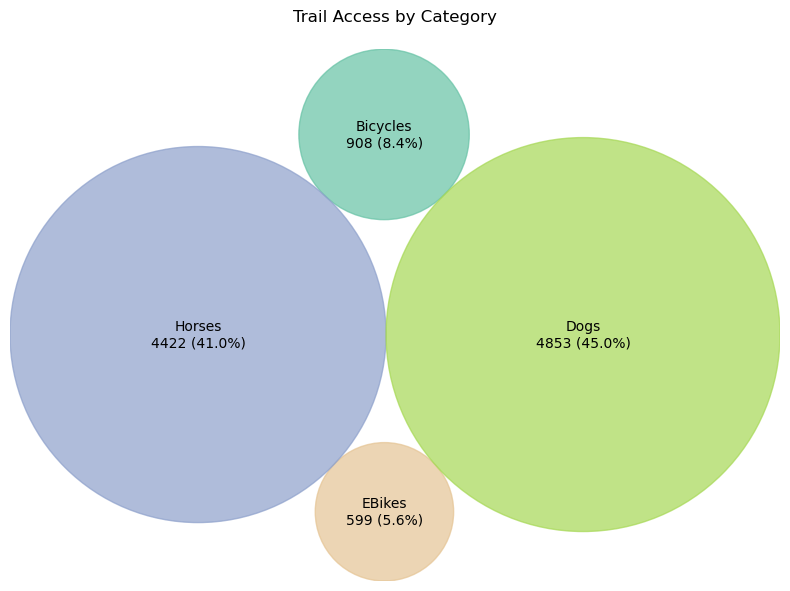

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load your cleaned merged dataset
merged_df = pd.read_csv("../resources/merged_trails.csv")
merged_df.columns = merged_df.columns.str.strip()

# Columns of interest (already renamed during cleaning)
columns_of_interest = {
    "Bicycles": "bicycles",
    "Horses": "horses",
    "Dogs": "dogs",
    "EBikes": "ebikes"
}

# Count 'Yes' values for each trail use category
trail_use_counts = {
    key: (merged_df[col].str.strip().str.lower() == "yes").sum()
    for key, col in columns_of_interest.items()
}

# Calculate total for percentage calculations
total_count = sum(trail_use_counts.values())

# Build data list for circlify
data = [{'id': k, 'datum': v} for k, v in trail_use_counts.items() if v > 0]

# Create circle layout
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Determine axis limits
x_coords = [c.x for c in circles if c.level == 1]
y_coords = [c.y for c in circles if c.level == 1]
radii = [c.r for c in circles if c.level == 1]
x_min = min(x - r for x, r in zip(x_coords, radii))
x_max = max(x + r for x, r in zip(x_coords, radii))
y_min = min(y - r for y, r in zip(y_coords, radii))
y_max = max(y + r for y, r in zip(y_coords, radii))

# Set up color map
colormap = cm.get_cmap('Set2')

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.axis('off')

# Draw each circle
for circle in circles:
    if circle.level != 1:
        continue

    x, y, r = circle.x, circle.y, circle.r
    label = circle.ex['id']
    value = int(circle.ex['datum'])
    percent = (value / total_count) * 100
    label_text = f"{label}\n{value} ({percent:.1f}%)"
    color = colormap(data.index(circle.ex) / len(data))  # Color map by index

    ax.add_patch(plt.Circle((x, y), r, color=color, alpha=0.7, edgecolor='black'))
    plt.text(x, y, label_text, ha='center', va='center', fontsize=10)

plt.title("Trail Access by Category", pad=20)
plt.tight_layout()
plt.show()